In [10]:
# This is a notebook to perform spectral decomposition of a 1D spectrum extracted from JWST MIRI/MRS cubes.
# The spectrum can be obtained with CRETA, or be provided by the user as an ascii table with colums including wavelenght, flux, and flux error.

In [ ]:
import os
os._exit(00)

In [1]:
import sys
sys.path.insert(0, '../')

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages

import cafe_io
from cafe_io import *
import cafe_helper
import cafe

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Setup data directory and parameter files.
source_fd = '../../CRETA/extractions/'
source_fn = 'IIZw096_SingleExt_r0.3as_cube.fits'
source_fnb = source_fn.split('.fits')[0].replace('.','')

cafe_dir = '../'
inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_miri_IIZw096.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

z=0.03637

In [3]:
s = cafe.specmod(cafe_dir)

In [4]:
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (11532,)   float64   
  2  ERR           1 ImageHDU         7   (11532,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (11532,)   float64   
  4  ERR_ST        1 ImageHDU         7   (11532,)   float64   
  5  DQ            1 ImageHDU         7   (11532,)   float64   
  6  WAVE          1 ImageHDU         7   (11532,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   11532R x 1C   [20A]   


Generating continuum profiles for guess model
Parameter object has 35 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
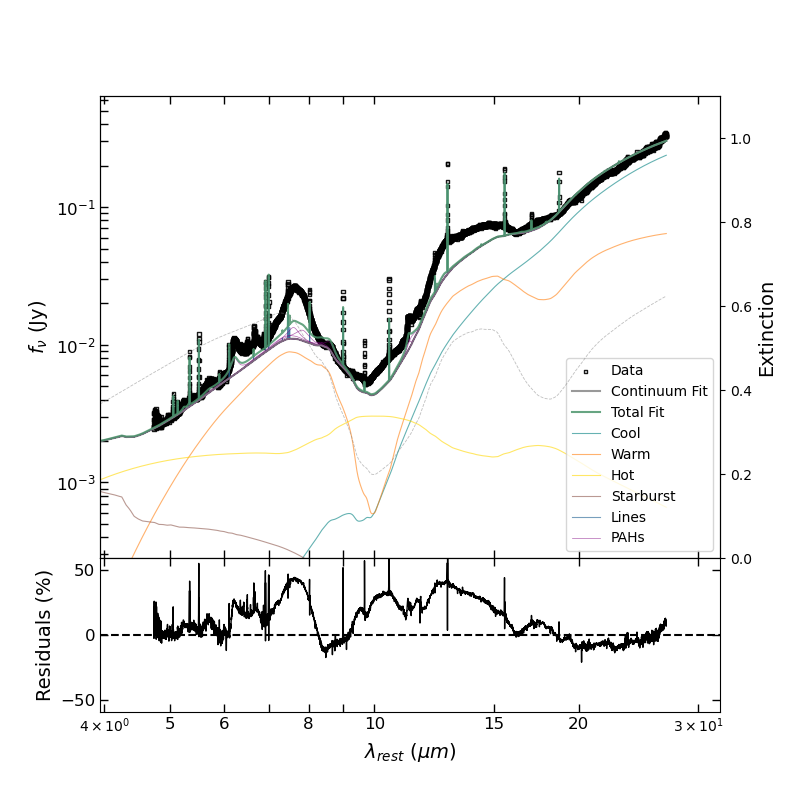

In [5]:
s.plot_spec_ini(inppar_fn, optpar_fn)

In [18]:
s.fit_spec(inppar_fn, optpar_fn)

Generating parameter object
Parameter object has 35 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
ISRF
ISRF
2.52 seconds to make continnum profiles
Generating parameter cube
Fitting 223 parameters
Iteration 1/5(max): 2023-01-10 15:13:41.546027 -----------------
True in 47 steps
88.15 seconds elapsed
<Parameter 'STB_FLX', value=2.5290696277967117e-08 +/- 0.929, bounds=[0.0:2.0]> at lower bound, fixing to 0.0
<Parameter 'g_FeII_50624N_Peak', value=3.9193702052730985e-23 +/- 0.00179, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'g_Humphreys96_59066N_Peak', value=5.156623358296311e-21 +/- 0.0054, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'g_Pfund65_74578B_Gamma', value=0.006671113472843534 +/- 0.00112, bounds=[0.00026406733481945227:0.0066711140760507]> at upper bound, fixing to 0.0066711140760507
<Parameter 'g_ArV_79016N_Peak', value=1.6718380075305756e-25 +/- 0.00338, bounds=[0.0:inf]> at lower bound, fixing t

In [19]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-0.19667332038847174
-6.560150780135815e-07


ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


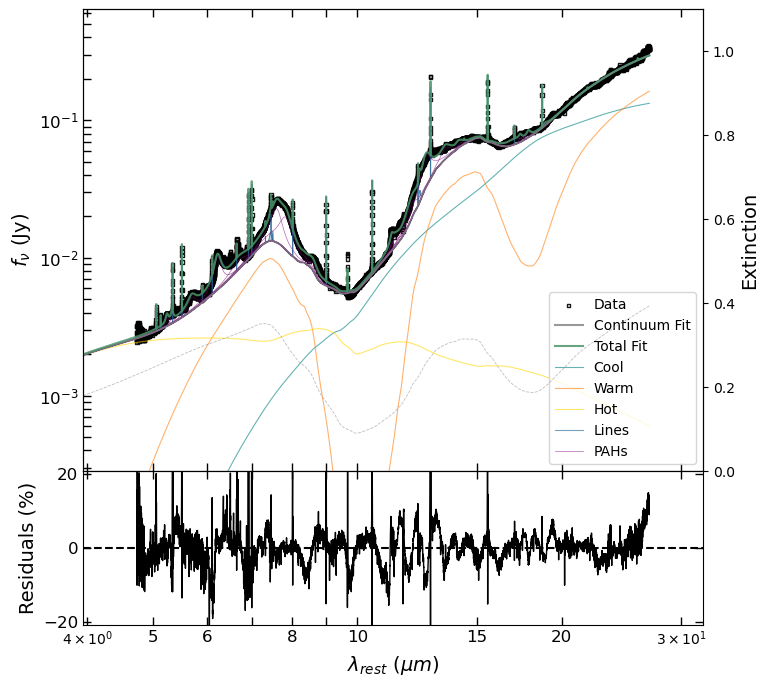

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
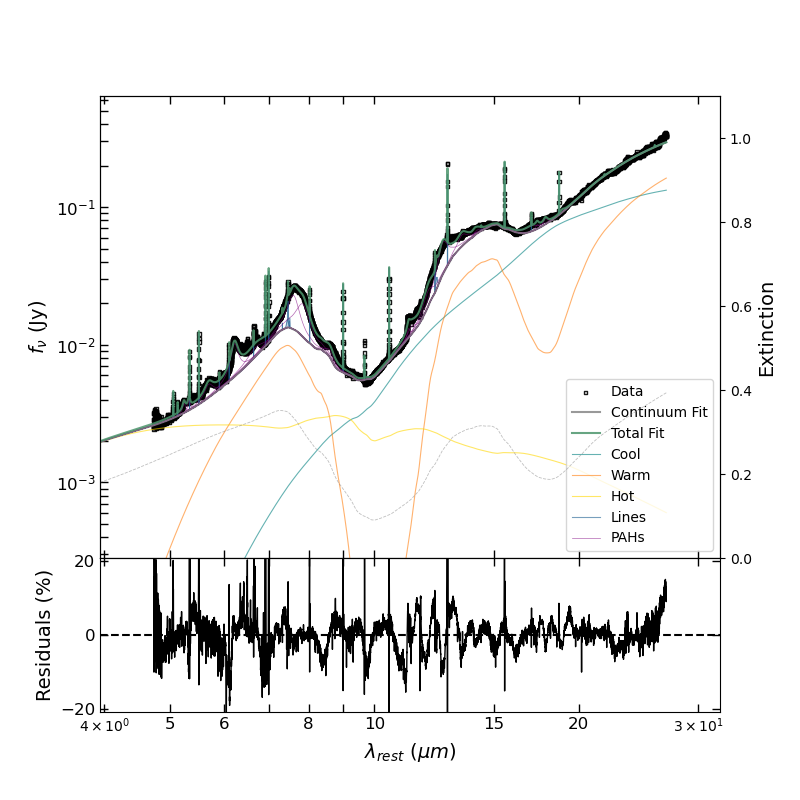

In [20]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [6]:
# Load the parameter cube from drive
parcube_fd = '../output/'+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [7]:
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (11532,)   float64   
  2  ERR           1 ImageHDU         7   (11532,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (11532,)   float64   
  4  ERR_ST        1 ImageHDU         7   (11532,)   float64   
  5  DQ            1 ImageHDU         7   (11532,)   float64   
  6  WAVE          1 ImageHDU         7   (11532,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   11532R x 1C   [20A]   


In [ ]:
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 223)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 223)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 223)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 223)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 223)   float64   
  6  EXPR          1 BinTableHDU     13   223R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   223R x 2C   [I, 32A]   


In [28]:
from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

# Read output PAH table
pah = cafe_io.pah_table(s.parcube, 0, 0)
# Read output line table
line = cafe_io.line_table(s.parcube, 0, 0)

pah62 = pah[pah.index == 'PAH62'].pah_strength.values[0]
pah62_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah77 = pah[pah.index == 'PAH77_C'].pah_strength.values[0]
pah77_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah113 = pah[pah.index == 'PAH113_C'].pah_strength.values[0]
pah113_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]

x = pah62 / pah77 
x_unc = pah62 / pah77 * np.sqrt((pah62_unc/pah62)**2 + (pah77_unc/pah77)**2)
y = pah113 / pah77
y_unc = pah113 / pah77 * np.sqrt((pah113_unc/pah113)**2 + (pah77_unc/pah77)**2)

print('6.2/7.7 = {} +/- {}'.format(x, x_unc))
print('11.3/7.7 = {} +/- {}'.format(y, y_unc))

print(pah)

# Make an astropy table 
t = QTable([pah.index.values, pah.pah_strength, pah.pah_strength_unc],
           names = ('pah_complex', 'pah_strength', 'pah_strength_unc'),
           meta={'wavelength': 'micron',
                 'flux': 'W/m^2',
                }
          )

# Write PAH table in an .ecsv file
#t.write('./NGC7469_pah_tbl.ecsv', overwrite=False)

AttributeError: module 'cafe_io' has no attribute 'pah_table'